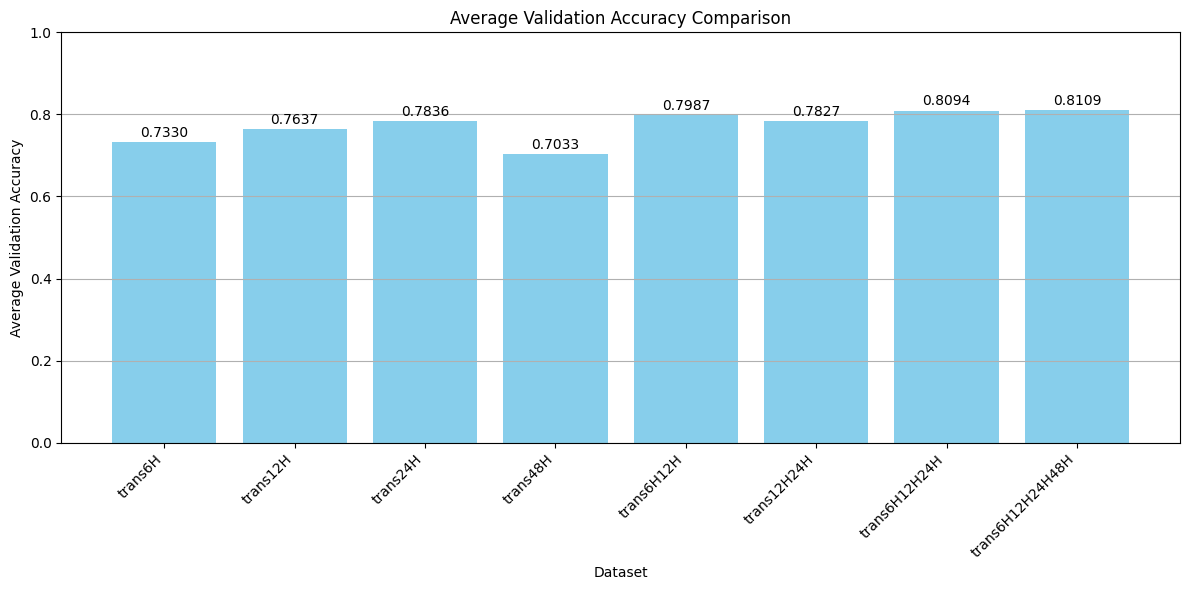

In [2]:
import pandas as pd

trans6H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_6H.csv')
trans12H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_12H.csv')
trans24H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_24H.csv')
trans48H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_48H.csv')
trans6H12H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_6H12H.csv')
#trans6H24H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2/transformer_6H_24H.csv')
#trans6H48H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2/transformer_6H_48H.csv')
trans12H24H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_12H24H.csv')
#trans12H48H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2/transformer_12H_48H.csv')
#trans24H48H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2/transformer_24H_48H.csv')
trans6H12H24H = pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_6H_12H_24H.csv')
trans6H12H24H48H= pd.read_csv('/data2/project/2024summer/jhy0812/transdata2(icd_10)/transformer_6H_12H_24H_48H.csv')

import matplotlib.pyplot as plt
import numpy as np

# 불러온 데이터프레임 리스트 (이전에 불러온 데이터프레임들)
dataframes = {
    'trans6H': trans6H,
    'trans12H':trans12H,
    'trans24H':trans24H,
    'trans48H':trans48H,
    'trans6H12H':trans6H12H,
    #'trans6H24H':trans6H24H,
    #'trans6H48H':trans6H48H,
    'trans12H24H':trans12H24H,
    #'trans12H48H':trans12H48H,
    #'trans24H48H':trans24H48H,
    'trans6H12H24H':trans6H12H24H,
    'trans6H12H24H48H':trans6H12H24H48H
}


# 각 데이터셋의 Validation Accuracy 평균 계산
val_accuracy_means = {}

for dataset_name, df in dataframes.items():
    # 각 폴드에 대한 Validation Accuracy 계산
    val_acc_mean = df['val_acc'].mean()  # val_acc 열의 평균값 계산
    val_accuracy_means[dataset_name] = val_acc_mean

# 막대그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(val_accuracy_means.keys(), val_accuracy_means.values(), color='skyblue')

plt.title('Average Validation Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Average Validation Accuracy')
plt.xticks(rotation=45, ha='right')  # X축 레이블을 회전하여 보기 쉽게 설정
plt.grid(axis='y')
plt.ylim(0, 1)


# 그래프 위에 각 막대의 값 표시
for i, (dataset, mean_acc) in enumerate(val_accuracy_means.items()):
    plt.text(i, mean_acc + 0.005, f'{mean_acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [7]:
# 각 데이터셋의 Precision, Recall, F1, Accuracy, ROC-AUC 평균 계산
metrics_means = {}

# 각 데이터셋에 대한 평균 계산
for dataset_name, df in dataframes.items():
    metrics_mean = df[['val_precision', 'val_recall', 'val_f1', 'val_acc', 'val_auroc']].mean()  # 필요한 열들의 평균 계산
    metrics_means[dataset_name] = metrics_mean

# 평균값을 데이터프레임으로 변환
metrics_means_df = pd.DataFrame(metrics_means)

# 전치하여 보기 편하게 만듦
metrics_means_df = metrics_means_df.transpose()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Metrics Means Table", dataframe=metrics_means_df)


In [8]:
metrics_means_df

,val_precision,val_recall,val_f1,val_acc,val_auroc
trans6H,0.392898,0.739873,0.503466,0.732958,0.822189
trans12H,0.433137,0.730209,0.530817,0.763744,0.841181
trans24H,0.453677,0.719170,0.544342,0.783644,0.839317
trans48H,0.365828,0.777678,0.488199,0.703252,0.828560
trans12H24H,0.463117,0.752815,0.561363,0.782717,0.853585
trans6H12H24H,0.497566,0.725687,0.580887,0.809394,0.858911
trans6H12H24H48H,0.508215,0.728520,0.586496,0.810903,0.863001


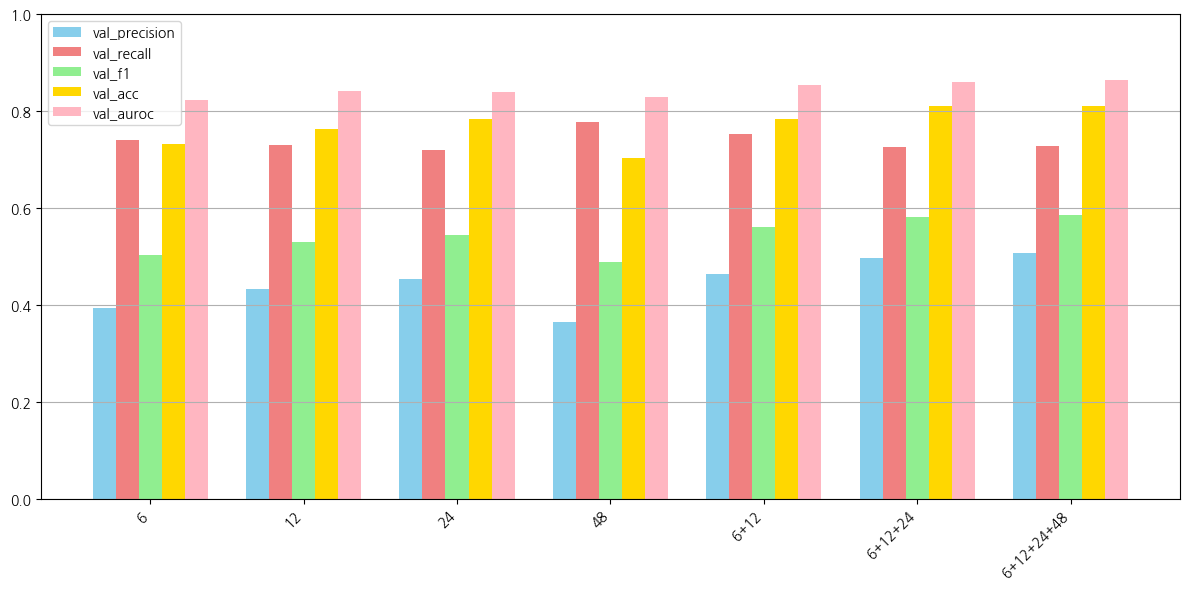

In [12]:
# 성능 지표
metrics = ['val_precision', 'val_recall', 'val_f1', 'val_acc', 'val_auroc']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']

# 데이터셋의 개수와 막대의 너비 설정
n_datasets = len(metrics_means_df.index)
bar_width = 0.15
index = np.arange(n_datasets)

# X축 레이블 변경
xtick_labels = ['6', '12', '24', '48', '6+12', '6+12+24', '6+12+24+48']

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, metrics_means_df[metric], bar_width, color=colors[i], label=metric)

plt.xticks(index + bar_width * (len(metrics) - 1) / 2, xtick_labels, rotation=45, ha='right')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.ylim(0, 1)

# Y축 레이블과 X축 레이블 제거
plt.xlabel('')
plt.ylabel('')

# 그래프 그리기
plt.tight_layout()
plt.show()


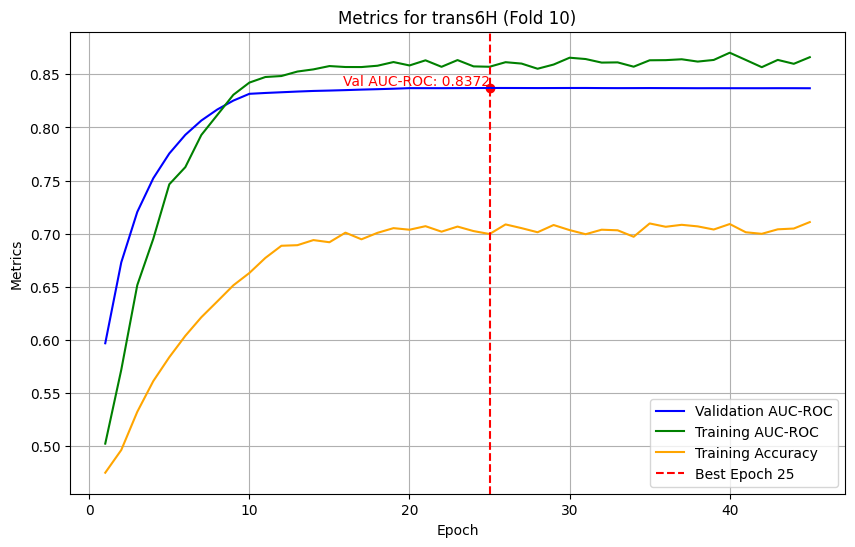

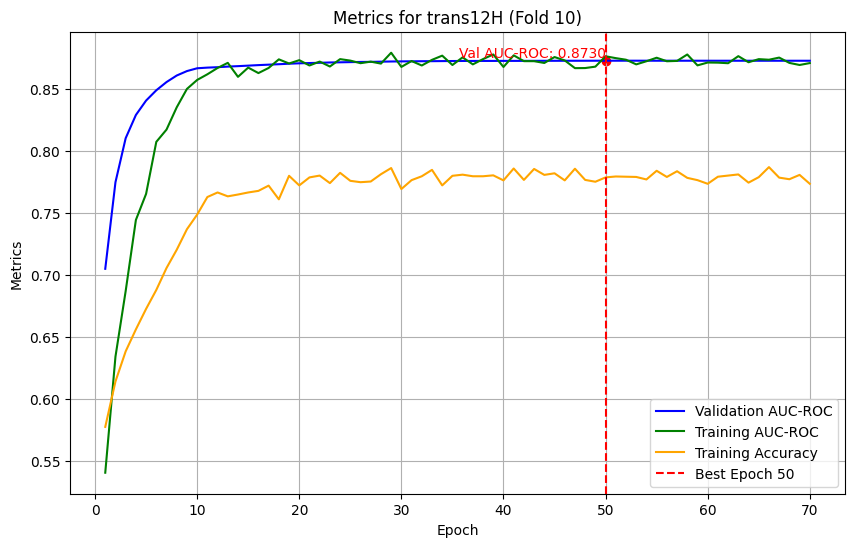

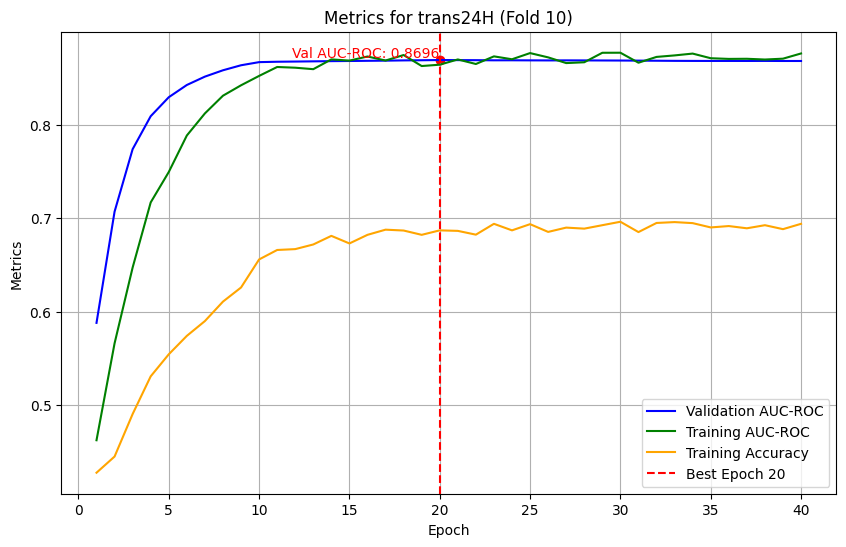

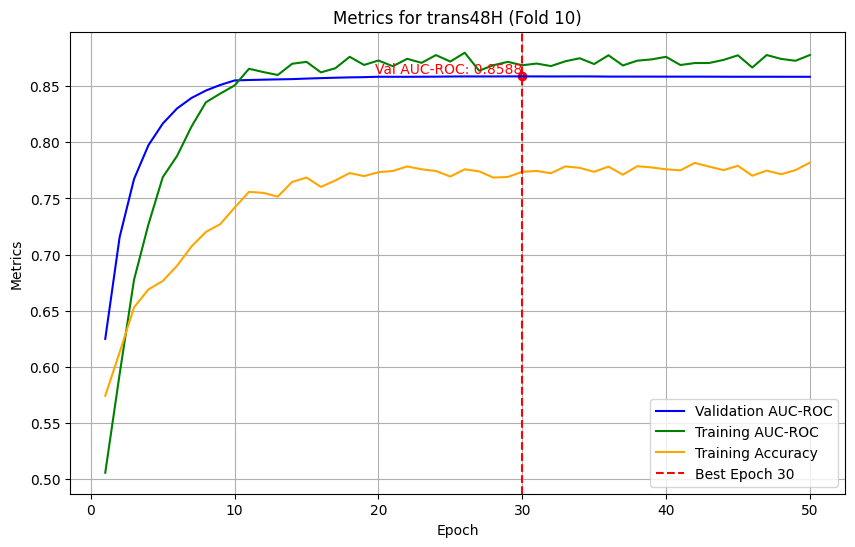

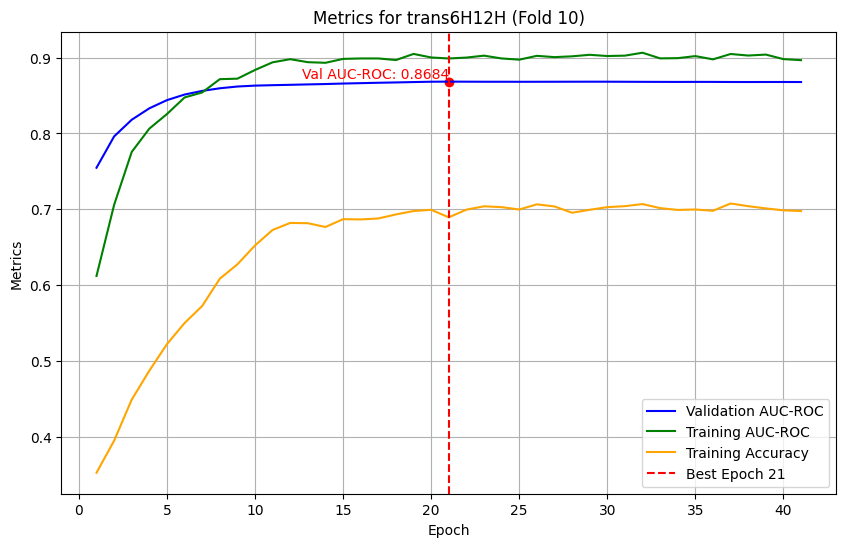

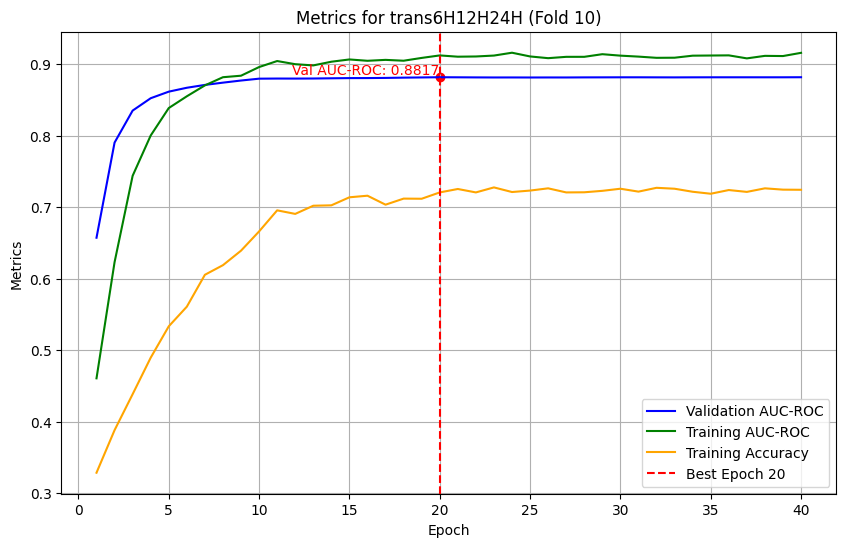

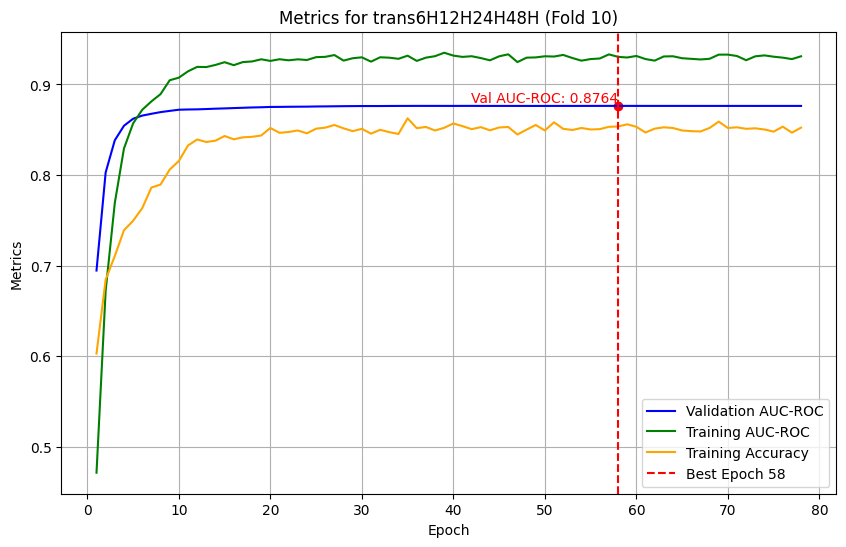

In [59]:
# 임의의 폴드 선택 (예: 폴드 10)
selected_fold = 10

# 모든 데이터셋에 대해 AUC-ROC 곡선 그리기 및 베스트 모델 에포크 표시
for dataset_name, df in dataframes.items():
    # 선택한 폴드에 해당하는 데이터만 필터링
    fold_data = df[df['fold'] == selected_fold]
    
    if not fold_data.empty:
        plt.figure(figsize=(10, 6))
        
        # Validation AUC-ROC
        plt.plot(fold_data['epoch'], fold_data['val_auroc'], label='Validation AUC-ROC', color='blue')
        
        # Training AUC-ROC
        plt.plot(fold_data['epoch'], fold_data['train_auroc'], label='Training AUC-ROC', color='green')
        
        # Training Accuracy
        plt.plot(fold_data['epoch'], fold_data['train_acc'], label='Training Accuracy', color='orange')
        
        # 베스트 모델이 저장된 에포크 가져오기
        best_epoch = fold_data['best_epoch'].iloc[-1]  # 모든 행에서 동일한 best_epoch를 가정
        best_auroc = fold_data[fold_data['epoch'] == best_epoch]['val_auroc'].values[0]
        
        # 베스트 모델 시점에 마커 및 텍스트 추가
        plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch {best_epoch}')
        plt.scatter(best_epoch, best_auroc, color='red')  # 베스트 에포크에 해당하는 AUC-ROC에 점 표시
        
        # AUC-ROC 값을 그래프에 텍스트로 표시
        plt.text(best_epoch, best_auroc, f'Val AUC-ROC: {best_auroc:.4f}', color='red', 
                 verticalalignment='bottom', horizontalalignment='right')
        
        plt.title(f'Metrics for {dataset_name} (Fold {selected_fold})')
        plt.xlabel('Epoch')
        plt.ylabel('Metrics')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for fold {selected_fold} in dataset {dataset_name}")